Task 1: Youtube Streamer Analysis

INTRODUCTION

This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribes, country, visits, likes, comments, and more. Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.

1. Data Exploration and Cleaning

In [4]:
#importing my libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Uzoma Peculiar\Downloads\DATASETS\youtubers_df.csv")

In [5]:
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [6]:
df.shape

(1000, 9)

In [7]:
#Looking for Duplicates
df.duplicated().sum()

0

In [8]:
df[df.Links.duplicated(keep=False)]

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,56300.0,96.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000.0,Estados Unidos,797600.0,50400.0,179.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000.0,Estados Unidos,772800.0,45000.0,185.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,63600.0,75.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Música y baile,12100000.0,Pakistán,62200.0,810.0,59.0,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Películas,12000000.0,Rusia,173600.0,6600.0,105.0,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [9]:
#Check for missing values
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [10]:
df.Categories.value_counts()

Categories
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehí

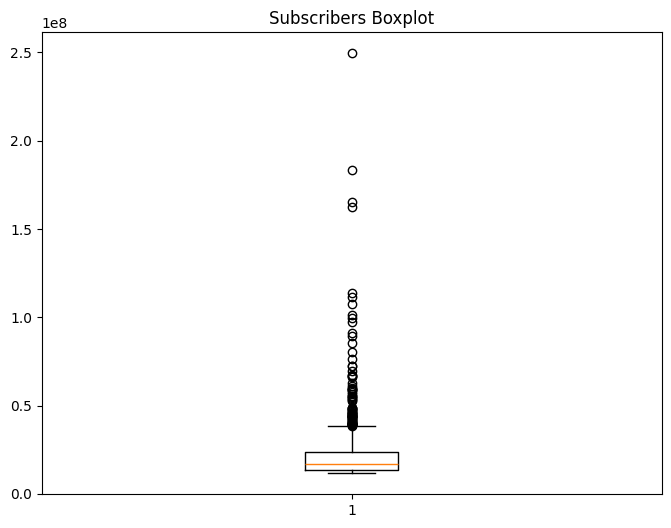

In [11]:
#Identifying outliers using boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df['Suscribers'])
plt.title('Subscribers Boxplot')
plt.show()

In [12]:
#Removing Outliers
Q1 = df['Suscribers'].quantile(0.25)
Q3 = df['Suscribers'].quantile(0.75)
IQR = Q3 - Q1

lower_lim = Q1 - (1.5*IQR)
upper_lim = Q3 + (1.5*IQR)

outliers_removed = df[(df['Suscribers']>lower_lim) & (df['Suscribers']<upper_lim)]
outliers_removed

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
79,80,TheEllenShow,NaN,38300000.0,Estados Unidos,26000.0,433.0,22.0,http://youtube.com/channel/UCp0hYYBW6IMayGgR-W...
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
81,82,LikeNastya_ESP,NaN,38100000.0,Unknown,403800.0,1800.0,0.0,http://youtube.com/channel/UCpEJRZdSpdVZ8vh63T...
82,83,one31official,NaN,38100000.0,Tailandia,4800.0,122.0,1.0,http://youtube.com/channel/UC8f7MkX4MFOOJ2SerX...
83,84,ABPNEWS,NaN,38100000.0,India,2400.0,59.0,0.0,http://youtube.com/channel/UCRWFSbif-RFENbBrSi...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [13]:
#Removing null values
df_cleaned = outliers_removed.dropna()
df_cleaned

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
80,81,DaddyYankee,Música y baile,38300000.0,Colombia,82800.0,6500.0,123.0,http://youtube.com/channel/UC9TO_oo4c_LrOiKNaY...
84,85,MariaClaraeJP,"Películas, Animación",37700000.0,Unknown,1700000.0,10800.0,0.0,http://youtube.com/channel/UCKe6w0exI94U-RzqAy...
86,87,PowerKidstv,"Películas, Animación",37400000.0,India,41700.0,0.0,0.0,http://youtube.com/channel/UCj-SWZSE0AmotGSQ3a...
89,90,SaregamaMusic,Películas,37000000.0,India,27300.0,703.0,26.0,http://youtube.com/channel/UC_A7K2dXFsTMAciGmn...
90,91,RicisOfficial1795,"Música y baile, Películas",36900000.0,Indonesia,343800.0,27500.0,357.0,http://youtube.com/channel/UC4tS4Q_Cno5JVcIUXx...
...,...,...,...,...,...,...,...,...,...
989,990,cut,Humor,11700000.0,Estados Unidos,359000.0,8800.0,342.0,http://youtube.com/channel/UCbaGn5VkOVlcRgIWAH...
990,991,JoeHattab,Películas,11700000.0,Somalia,1900000.0,98500.0,2900.0,http://youtube.com/channel/UCe6eisvsctSPvBhmin...
991,992,BeAmazed,Educación,11700000.0,Estados Unidos,477800.0,9900.0,556.0,http://youtube.com/channel/UCkQO3QsgTpNTsOw6uj...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...


In [14]:
df_cleaned.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,633.000000,6.330000e+02,6.330000e+02,6.330000e+02,633.000000
mean,539.333333,1.829921e+07,1.027089e+06,4.633663e+04,1538.298578
std,263.771024,6.178550e+06,4.268851e+06,2.305840e+05,8222.198243
min,81.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,315.000000,1.360000e+07,3.430000e+04,5.350000e+02,3.000000
50%,535.000000,1.620000e+07,1.551000e+05,3.300000e+03,86.000000
75%,766.000000,2.110000e+07,7.683000e+05,2.270000e+04,505.000000
max,1000.000000,3.830000e+07,8.310000e+07,5.000000e+06,154000.000000


In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 80 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        633 non-null    int64  
 1   Username    633 non-null    object 
 2   Categories  633 non-null    object 
 3   Suscribers  633 non-null    float64
 4   Country     633 non-null    object 
 5   Visits      633 non-null    float64
 6   Likes       633 non-null    float64
 7   Comments    633 non-null    float64
 8   Links       633 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.5+ KB


In [16]:
df_cleaned.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

2. Trend Analysis

Identify trends among the top YouTube streamers. Which categories are the most popular?. Is there a correlation between the number of subscribers and the number of likes or comments?

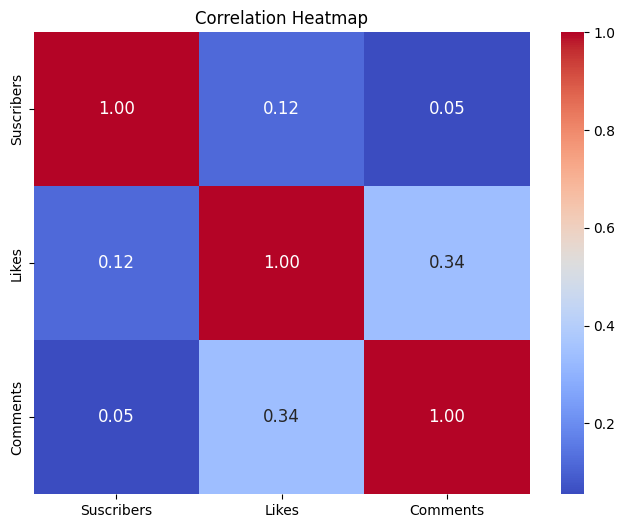

In [17]:
#Plotting correlation heatmap with columns (Subscribes, Likes and Comments)
columns = df_cleaned[['Suscribers','Likes','Comments']]

#Calculate the correlation matrix
correlation_matrix = columns.corr()

#Creating heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',annot_kws={'size':12})
plt.title('Correlation Heatmap')
plt.show()

Observations

Interestingly, there is no evident correlation between the number of subscribes and likes, nor between suscribers and comments.

3. Audience Study

Analyze the distribution of streamers' audience by country. Are there regional preferences for specific content categoriess?

In [18]:
df_cleaned['Categories'].loc[df['Country']=='Indonesia'].value_counts().nlargest(10).values

array([12,  4,  4,  2,  2,  1,  1,  1,  1,  1], dtype=int64)

In [19]:
df_cleaned['Categories'].loc[df['Country']=='Indonesia'].value_counts().nlargest(10).keys()

Index(['Música y baile, Películas', 'Películas, Animación', 'Música y baile',
       'Películas', 'Películas, Humor', 'Videojuegos', 'Música y baile, Humor',
       'Vlogs diarios', 'Animación, Videojuegos', 'Noticias y Política'],
      dtype='object', name='Categories')

<Axes: xlabel='Categories'>

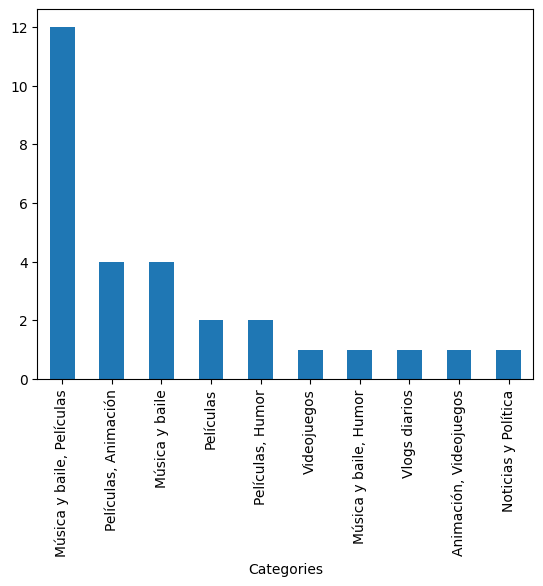

In [20]:
df_cleaned['Categories'].loc[df['Country']=='Indonesia'].value_counts().nlargest(10).plot(kind='bar')

The plot shows engagements for the top 10 categories in Indonesia where 'Musica y baile' still has the highest number of engagements.

4. Performance Metrics

Calculate and visualize the average number of subscribers, visits, likes, and comments.
Are there patterns or anomalies in these metrics?

In [21]:
#Calculating average metrics: subscribers, visits, likes and comments
average_values = df[['Suscribers','Visits','Likes','Comments']].mean()

print('Average Number of:')
print(f'Subscribes: {average_values['Suscribers']:.2f}')
print(f'Visits: {average_values['Visits']:.2f}')
print(f'Likes: {average_values['Likes']:.2f}')
print(f'Comments: {average_values['Comments']:.2f}')

Average Number of:
Subscribes: 21894400.00
Visits: 1209446.32
Likes: 53632.59
Comments: 1288.77


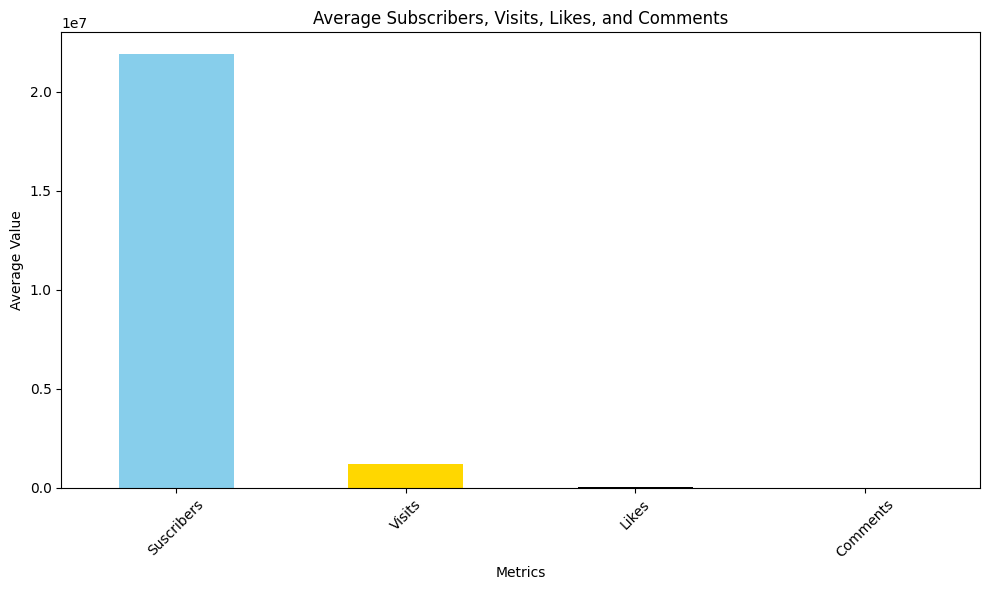

In [22]:
plt.figure(figsize=(10,6))
average_values.plot(kind='bar',color=['skyblue','gold','black','red'])
plt.title('Average Subscribers, Visits, Likes, and Comments')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
df[['Suscribers','Visits','Likes','Comments']].describe()

,Suscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


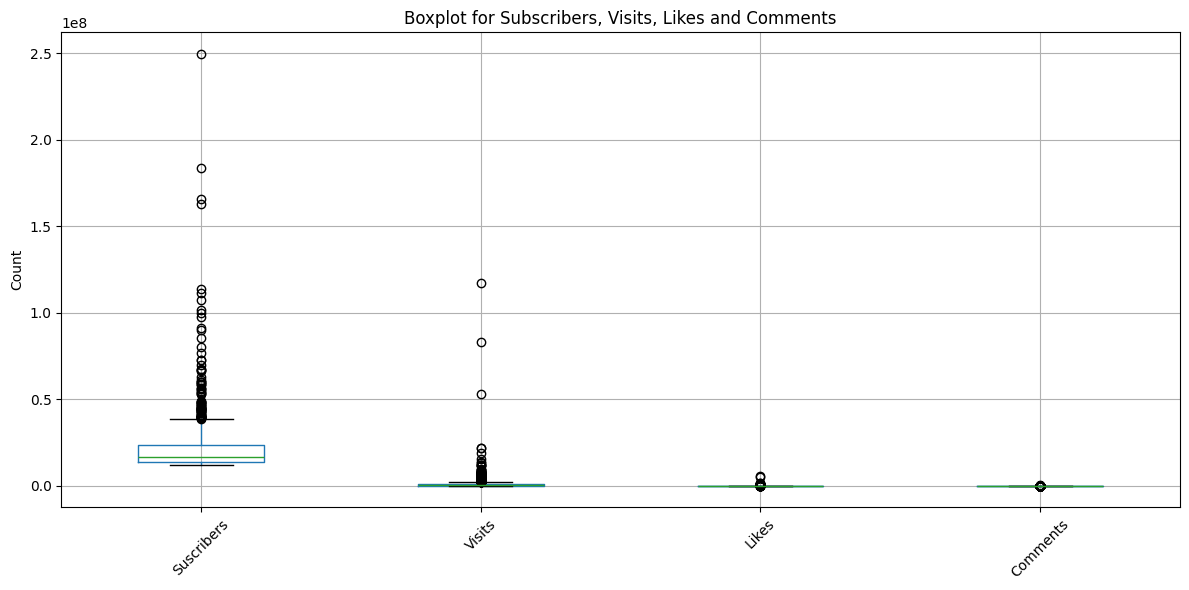

In [24]:
#Boxplot to visualize distribution and outliers
plt.figure(figsize=(12,6))
df[['Suscribers','Visits','Likes','Comments']].boxplot()
plt.title('Boxplot for Subscribers, Visits, Likes and Comments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Content Categories

Explore the distribution of content categories. Which categories have the highest number of streamers?
Are there specific categories with exceptional performance metrics?

In [25]:
#Counting the number of streamers in each content category
category_count = df['Categories'].value_counts()

#Display top categories by the number of streamers
print('Top Categories by Number of Streamers:')
category_count.head(10)

Top Categories by Number of Streamers:


Categories
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Películas, Humor              34
Animación, Videojuegos        34
Animación, Juguetes           29
Animación, Humor              27
Películas                     24
Name: count, dtype: int64

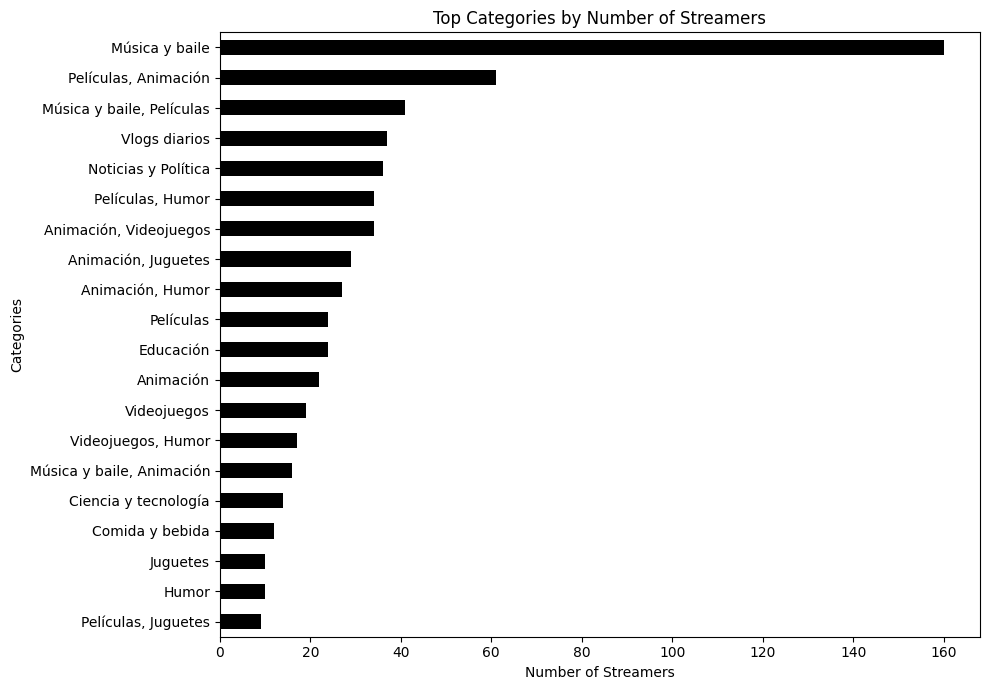

In [26]:
#Visualize the distribution of streamers across categories using a horizontal bar
plt.figure(figsize=(10,7))
category_count.head(20).sort_values().plot(kind='barh',color='black')
plt.title('Top Categories by Number of Streamers')
plt.xlabel('Number of Streamers')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

In [27]:
#Calculate mean for subscribers, likes, comments and visits
category_metrics = df.groupby('Categories')[['Likes','Comments']].mean()


threshold_likes = category_metrics['Likes'].quantile(0.75)
threshold_comments = category_metrics['Comments'].quantile(0.75)

exceptional_categories = category_metrics[
    (category_metrics['Likes']>threshold_likes)&
    (category_metrics['Comments']>threshold_comments)
]


In [28]:
exceptional_categories

,Likes,Comments
Categories,,
"Animación, Humor",145768.333333,5344.962963
"Animación, Videojuegos",79294.029412,3786.617647
Animales y mascotas,102750.000000,2806.000000
Comida y bebida,128664.750000,3053.416667
"Diseño/arte, DIY y Life Hacks",127300.000000,2200.000000
Humor,169990.000000,5159.800000
"Videojuegos, Humor",420511.764706,4827.058824


6. Brands and Collaborations

Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

Data on brand collaboration and marketing campaigns was not provided. To analyze whether high performance streamers have more brand collaborations or marketing campaigns, you'd need additional data or columns indicating brand collaborations. This could involve integrating columns related to brand partnerships or collaboration counts for each streamer in the dataset.

7. Benchmarking

Identify streamers with above-average performance in terms of subscribers, likes, visits and comments.
Who are the top-performing content creators?

In [29]:
#Calculate average metrics
average_metrics = df[['Suscribers','Likes','Comments']].mean()

#Identify streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers']>average_metrics['Suscribers'])&
    (df['Likes']>average_metrics['Likes'])&
    (df['Comments']>average_metrics['Comments'])
]

In [30]:
top_content_creators = df.nlargest(10,'Suscribers')

print('Streamers with Above-Average Performance:')
print(above_average_streamers[['Username','Suscribers','Likes','Comments']])

print('\nTop-Performing Content Creators:')
print(top_content_creators[['Username','Suscribers','Likes','Comments']])

Streamers with Above-Average Performance:
                  Username   Suscribers      Likes  Comments
1                  MrBeast  183500000.0  5300000.0   18500.0
5                PewDiePie  111500000.0   197300.0    4900.0
10               BLACKPINK   91300000.0   146900.0    3400.0
14                     BTS   76500000.0   180300.0    7400.0
26             dudeperfect   59700000.0   156500.0    4200.0
34             TaylorSwift   54100000.0   300400.0   15000.0
37            ArianaGrande   52900000.0    85800.0    3800.0
39             JuegaGerman   48600000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0   330400.0   22000.0
58               Mikecrack   43400000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0   271300.0   16000.0
64         luisitocomunica   41100000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    73500.0    1600.0
96          TotalGaming093   36300000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0   3